## Function Estimation


let's imagine we are trying to learn an arbitrary function from X to Y:

$$y = f(X) + \epsilon $$

where $y$ is a scalar, $f$ is an abitrary function, $X$ is a vector of values that we know, and $\epsilon$ represents a part of te function for which the variables are unkown to us.

We can look at an example of data like this below.  The example below is data about aeducation and susequent income for individuals.  What we would like to do is learn a function that predicts an individual's income from that individual'a level of education.  The central assumption is that we _can_ predict income from education.


In [43]:
import pandas as pd
df = pd.read_csv('Income1.csv')[['Education', 'Income']]
df.head()

,Education,Income
0,10.000000,26.658839
1,10.401338,27.306435
2,10.842809,22.132410
3,11.244147,21.169841
4,11.645485,15.192634


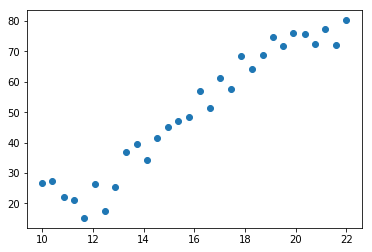

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['Education'], df['Income'])
plt.show()
            

Above we've created a scatter plot of the points in this set and it looks like the data is approximately set up on a line.  Lets draw the line that minimizes the error.  This line will be represented by the typical line formula:
$$ \hat{y} = \hat{f}(x) = mx + b $$
Where $\hat{y}$ is the estimated income.  We can use linear regression to calculate $m$ and $b$ and then we can use them to draw the line.

In [44]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('Income ~ Education', data=df, return_type='dataframe')
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
p = results.params
xs = np.arange(10, 22)
p

Intercept   -39.446257
Education     5.599483
dtype: float64

The Intercept above is $b$ and Education is $m$.  Now we can draw the best fit linear estimate.

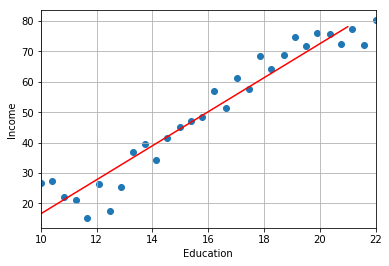

In [45]:
# scatter-plot data
ax = df.plot(x='Education', y='Income', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(xs, p.Intercept + p.Education * xs, color='red')
ax.set_xlim([10, 22])
plt.show()

Just by inspection this line looks very close to the data, suggesting there is a linear relationship between years of education education and income in this dataset.  Notice though that the line we calculated doesn't match the data perfectly.  Some is a little above or a little below the line.  That means we have some variance associated with the line.

More formally, the line above estimates our data with an approximate function
$$ \hat{y} = \hat{f}(x) $$
We can check what sort of error to expect by calculating the expected value of the squared difference of $\hat{y}$ and $y$.

$$E(y - \hat{y})^2 = E(f(X) + \epsilon - \hat{f}(X))^2$$
$$ = E(f(X) - \hat{f}(X))^2 + Var(\epsilon)$$

The first part of this result is expectation of the squared error that we can minimize during learining.  the second part is the variance of the uncontrolled error of the model.  Uncontrolled error is error caused by unknown parameters and other items that are missing from the analysis for whatever reason.